In [96]:
from pylab import *
from pythtb import *
from pythtb import *

In [97]:
plt.rcParams['figure.figsize'] = (3,3)

(<Figure size 300x300 with 1 Axes>, <Axes: >)

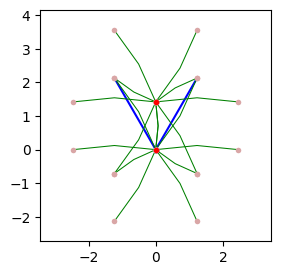

In [98]:
from pickle import TUPLE2
a = 1.42
a1 = a/2*array([sqrt(3),3])
a2 = a/2*array([-sqrt(3),3])
lat = [a1,a2]
sitioA = array([0,0])
sitioB = array([1/3,1/3])
orb = [sitioA,sitioB]

Haldane = tb_model(2,2,lat,orb)
t1 = 1
Haldane.set_hop( -t1,0,1,[0,0] )
Haldane.set_hop( -t1,0,1,[-1,0] )
Haldane.set_hop( -t1,0,1,[0,-1] )

t2  = 0.1
phi = pi/2

Haldane.set_hop(t2*exp( 1J*phi), 0,0,[-1,1])
Haldane.set_hop(t2*exp(-1J*phi), 0,0,[ 0,1])
Haldane.set_hop(t2*exp( 1J*phi), 0,0,[ 1,0])

Haldane.set_hop(t2*exp(-1J*phi), 1,1,[-1,1])
Haldane.set_hop(t2*exp( 1J*phi), 1,1,[ 0,1])
Haldane.set_hop(t2*exp(-1J*phi), 1,1,[ 1,0])

M = 1*t2
Haldane.set_onsite([M,-M])

Haldane.visualize(0,1)


In [99]:
Kpuntos = [[-1/2,1/2], [1/2,-1/2]]
kvec,kdist,knode = Haldane.k_path(Kpuntos,101,report=False)
Ek = Haldane.solve_all(kvec)

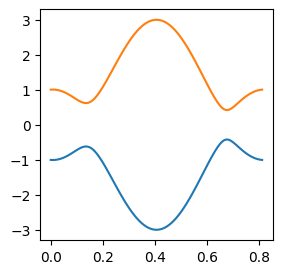

In [100]:
plot(kdist,Ek.T)

In [101]:
# Malla en el espacio reciproco
nkpts = 41
kmesh = Haldane.k_uniform_mesh((nkpts,nkpts))

# kmesh contiene los puntos k uniformes en la celda primitiva del espacio reciproco
Ek,U = Haldane.solve_all(kmesh, eig_vectors = True)

nband, numerok, nsites = shape(U)

# Para facilitar el cálculo, reordenamos los vectores para que tengan la estructura de la malla.
U0 = U[0].reshape((nkpts,nkpts,2))


def Curvatura(U):
    F = zeros((nkpts-1,nkpts-1), dtype = 'complex')
    for n in range(nkpts - 1):
        for m in range (nkpts-1):
            F[n,m] = imag(log( vdot(U[    n,    m],U[n+1,  m]) * \
                               vdot(U[n + 1,    m],U[n+1,m+1]) * \
                               vdot(U[n + 1,m + 1],U[  n,m+1]) * \
                               vdot(U[n    ,m + 1],U[  n,  m]) ))
    return F

F = Curvatura(U0)

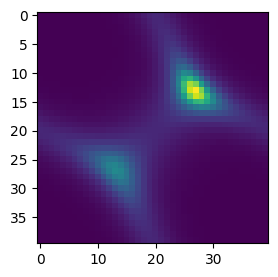

In [102]:
imshow(F.real)

In [103]:
A = array( [a1,a2] )
B = 2 * pi * inv(A)

b1,b2 = B.T

vectores_reciprocos = array([b1,b2])

KX,KY = dot( kmesh, vectores_reciprocos).T

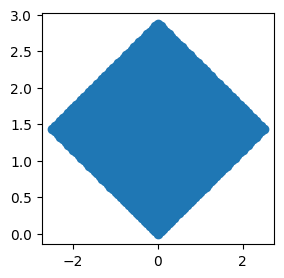

In [104]:
scatter(KX,KY)

In [105]:
# Con el fin de graficar la curvatura, F, 
# necesitamos que los KX y KY tengan la misma
# forma; es decir, que sean una matriz.
kx = KX.reshape((nkpts,nkpts))
ky = KY.reshape(nkpts,nkpts)

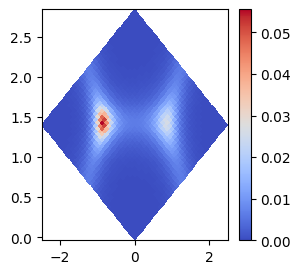

In [106]:
pcolormesh(kx[:-1,:-1],ky[:-1,:-1],F.real,cmap = 'coolwarm')
colorbar()
xlim = (-3,3)
ylim = (-3,3)

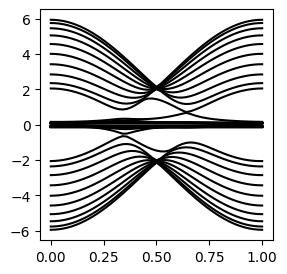

In [113]:
# Estudiemos estados en el espacio real
sc = Haldane.make_supercell([[1,0],[-2,1]])
ribbon = sc.cut_piece(10,1)

kvec = linspace(0,1,51)
Ek,U = ribbon.solve_all(kvec, eig_vectors = True)

plot(kvec,Ek.T, c = 'k');
indk = 26; indband = 20

#scatter(kvec[indk],Ek[indband][indk])

(<Figure size 300x300 with 1 Axes>, <Axes: >)

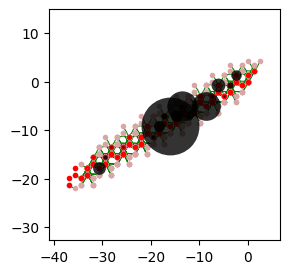

In [108]:
ribbon.visualize(0,1,eig_dr = U[indband][indk])

(<Figure size 300x300 with 1 Axes>, <Axes: >)

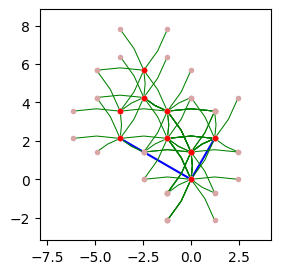

In [109]:
sc = Haldane.make_supercell([[1,0],[-1,2]])
sc.visualize(0,1)

(<Figure size 300x300 with 1 Axes>, <Axes: >)

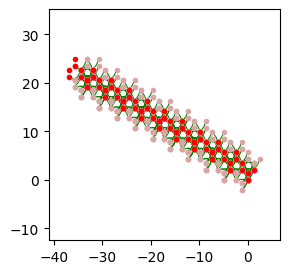

In [110]:
ribbon = sc.cut_piece(10,1)
ribbon.visualize(0,1)

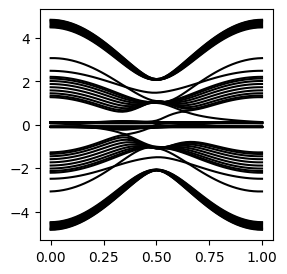

In [111]:
kmesh = linspace(0,1,51)
Ek = ribbon.solve_all(kmesh)
plot(kmesh,Ek.T,c='k');

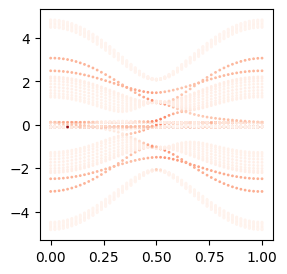

In [112]:
kmesh = linspace(0,1,51)
Ek,U = ribbon.solve_all(kmesh,eig_vectors=True)
Nband,Nk,Nsites = shape(U)
IPR = real( sum(U*conj(U)*U*conj(U),axis=2) )
kvec = outer(ones(Nband),kmesh)
scatter(kvec,Ek,c=IPR,cmap='Reds',s=1);